# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## IMPORTANT: Guidelines for a proper conduct of the exercises
1. you should create code that is correct, simple, well organized, indented, commented, which uses self-explanatory names for variables and that is numerically efficient.
2. I expect a responsible interaction during the exercises: the questions should be more related to the conduction of the exercises and to the meaning of the results obtained than to the computational problems. Bugs are usual in coding; for this reason, sooner or later, one should learn to deal with them by oneself ... if you'll be able to, it will be your main achievement in this Laboratory!

## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

In questo primo esercizio, l'obiettivo è calcolare il valore medio di una sequenza di numeri casuali generati uniformemente nell'intervallo [0, 1]. Un metodo semplice ma poco accurato consiste nel generare una grande quantità $N_{throw}$​ di questi numeri, calcolarne la media e determinare l'incertezza associata come la deviazione standard sulla media. Tuttavia, questo approccio non tiene conto delle correlazioni tra i dati, dovuta al fatto che i numeri generati non sono completamente indipendenti ma sono estratti secondo una legge che fa dipendere il dato successivo da quello precedente. Di conseguenza, calcolare l'incertezza in questo modo può portare a valori errati.

Per affrontare questo problema, si utilizza la tecnica delle medie a blocchi. Con questo metodo, la sequenza di numeri viene divisa in $N_{block}$ blocchi di uguale lunghezza. Per ciascun blocco, si calcola la media dei dati contenuti e queste medie rappresentano le misure. Calcolando la media e la deviazione standard su queste nuove misure, si evitano problemi di correlazione tra i dati; questo accade perchè adesso le uniche possibili correlazioni tra le misure dei blocchi sono date da quelle dei dati ai bordi dei blocchi: dunque allungando in modo opportuno il numero di dati per blocco, si possono rendere arbitrariamnete piccole eventuali correlazioni.

Nel plot seguente è presente l'andamento della media dei numeri random estratti dal nostro generatore in funzione del blocco. Per ogni blocco sono state utilizzate $10^4$ misure, necessarie per evitare effetti di correlazione ai bordi (per uno studio più approfondito di quando debbano essere lunghi i blocchi per evitare correlazioni, si rimanda alla esercitazione 7).

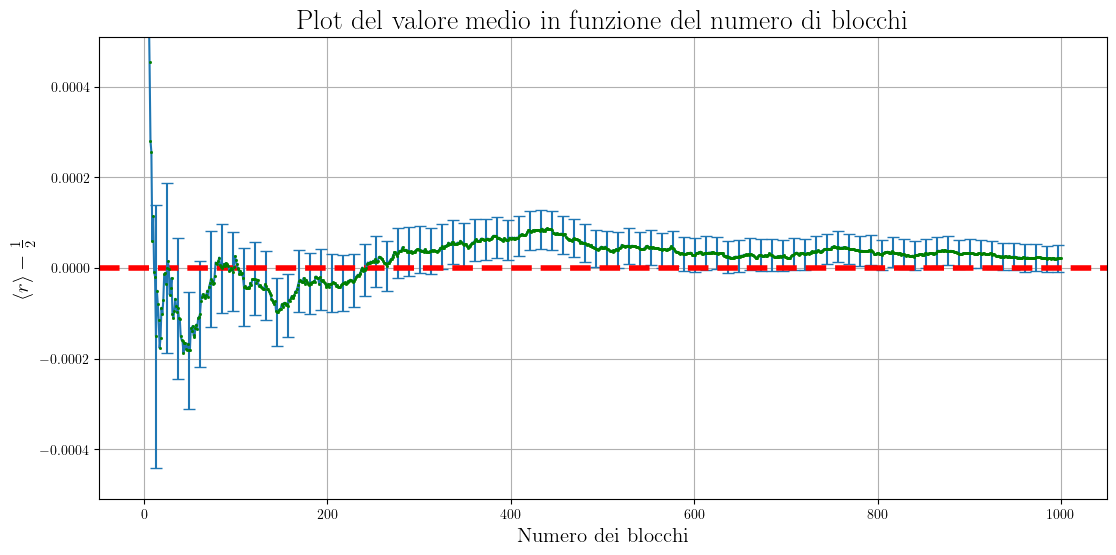

In [1]:
# Import delle librerie necessarie
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Configurazioni per l'utilizzo di LaTeX per la resa del testo
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Carica i dati dal file
data = np.loadtxt("esercizio_1.1/results.dat", usecols=(0,1,2), delimiter=' ', unpack=True)

# Seleziona solo i primi 1000 dati
x = data[0][:1000]
y = data[1][:1000]
error = data[2][:1000]

# Crea il plot
plt.figure(figsize=(13, 6))
plt.errorbar(x, y-0.5, yerr=error, errorevery=12, capsize=4, marker='s', mfc='green', mec='green', ms=1, mew=1)
plt.ylim(-0.00051,0.00051)
plt.xlabel('Numero dei blocchi', fontsize=15)
plt.ylabel(r'$\langle r \rangle-\frac{1}{2}$', fontsize=15)
plt.title('Plot del valore medio in funzione del numero di blocchi', fontsize=20, fontweight = "bold")
plt.axhline(y=0, color='red', linestyle='--', linewidth=4)
plt.grid()
plt.show()


Come ci si aspetta da un buon generatore di numeri casuali uniformi tra [0,1], il risultato numerico è dentro una deviazione standard dal risultato esatto.

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

Un ragionamento simile ora si può applicare per il calcolo della varianza in funzione del numero di blocchi. Per ogni i-esimo blocco si è calcolata la varianza $\sigma_i^2$ e poi si è calcolata la media di questi all'aumentare del numero dei blocchi. Come si vede dal grafico, la curva sembra tendere a convergere (entro circa un sigma e mezzo) a 1/12 che è il risultato teorico atteso.

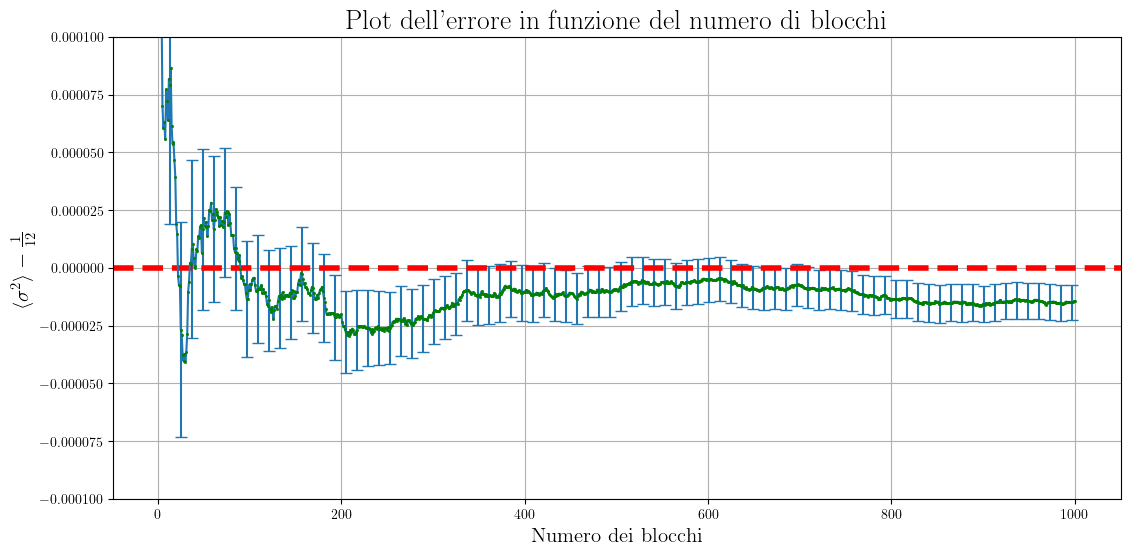

In [2]:
# Import delle librerie necessarie
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Configurazioni per l'utilizzo di LaTeX per la resa del testo
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Carica i dati dal file
data = np.loadtxt("esercizio_1.1/results.dat", usecols=(0,3,4), delimiter=' ', unpack=True)

# Seleziona solo i primi 1000 dati
x = data[0][:1000]
y = data[1][:1000]
error = data[2][:1000]

# Crea il plot
plt.figure(figsize=(13, 6))
plt.errorbar(x, y-1/12, yerr=error, errorevery=12, capsize=4, marker='s', mfc='green', mec='green', ms=1, mew=1)
plt.ylim(-0.0001,0.0001)  # Imposta i limiti dell'asse y
plt.xlabel('Numero dei blocchi', fontsize=15)
plt.ylabel(r'$\langle \sigma^2 \rangle-\frac{1}{12}$', fontsize=15)
plt.title('Plot dell\'errore in funzione del numero di blocchi', fontsize=20, fontweight="bold")
plt.axhline(y=0, color='red', linestyle='--', linewidth=4)  # Aggiungi una linea orizzontale
plt.grid()  # Mostra la griglia
plt.show()  # Mostra il plot


The hypothesis is that the numbers $r$ are drawn from a uniform distribution. In Statistics we cannot prove that some random events are drawn from a particular distribution (Note, in fact, that such hypothesis is false: pseudo-random numbers are drawn from a deterministic algorithm!); we can try to estimate the probability that $r$ **are not** drawn from a uniform distribution. If this probability is low, we can safely reject this last hypothesis.

Pearson's cumulative test statistic $\chi^2$ is a measure of the error between observations, $O_i$, and expected values, $E_i$:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
The numerator is a squared distance between observations, $O_i$, and expected values, $E_i$, and thus should be compared (at the denominator) with the expected squared fluctuations (variance) of the relative distribution. Why variance = $E_i$? 
The probability of getting exactly $k$ (independent) successes, each one with probability $p$, in $n$ trials is given by the Binomial distribution (see <a href="https://en.wikipedia.org/wiki/Binomial_distribution">this Wikipedia link</a>):
$$Pr(X=k) = {{n}\choose{k}} p^k (1-p)^{n-k} = \frac{n!}{k! (n-k)!} p^k (1-p)^{n-k}$$
The average of the Binomial distribution is $\langle X \rangle = np$, the variance is: $\sigma^2 = np (1-p)$. Thus if $p$ is small we have that $\sigma^2 \simeq np$, that is $\sigma^2 \simeq \langle X \rangle$ and this explains the denominator $E_i$ in $\chi^2$
</p>

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... <font color="red">but before judging</font>, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>).

Per valutare se il generatore è effettivamente un generatore di numeri casuali distribuiti uniformemente nell'intervallo [0, 1], ho eseguito un test del $\chi^2$. Questo test coinvolge la suddivisione dei dati di ciascun blocco in 100 bin nell'intervallo [0, 1]. Ogni blocco è composto da $10^4$ dati, e per ciascuno di essi ho calcolato il valore di $\chi^2$. Ci si aspetta che questo valore sia approssimativamente pari a 100 in quanto ho all'incirca 100 dof, dati dai 100 bin. Ripetendo questa procedura per $10^5$ blocchi, ho ottenuto i vari valori di $\chi_j^2$. L'ipotesi dunque è che questi seguano una distribuzione del $\chi^2$ con $100-1=99$ gradi di libertà, dove il meno uno è dato dal vincolo che se ho N valori di $\chi_j^2$, $N = \sum_{k=1}^{100} N_{bin,i}$, con $N_{\text{bin,i}}$ numero di dati nell'i-esimo bin.

Nel grafico sottostante è rappresentata proprio questa distribuzione. Gli errori sono stati calcolati come $\sqrt{N_{\text{bin,i}}}$. 

Ho eseguito un fit utilizzando la curva analitica del $\chi^2$ con un parametro libero: il numero di gradi di libertà (dof). Il valore ottenuto è $98.95 \pm 0.12$, compatibile con quello atteso.

chi-quadro: 30.9627361193737
Chi-quadro ridotto: 0.7036985481675841


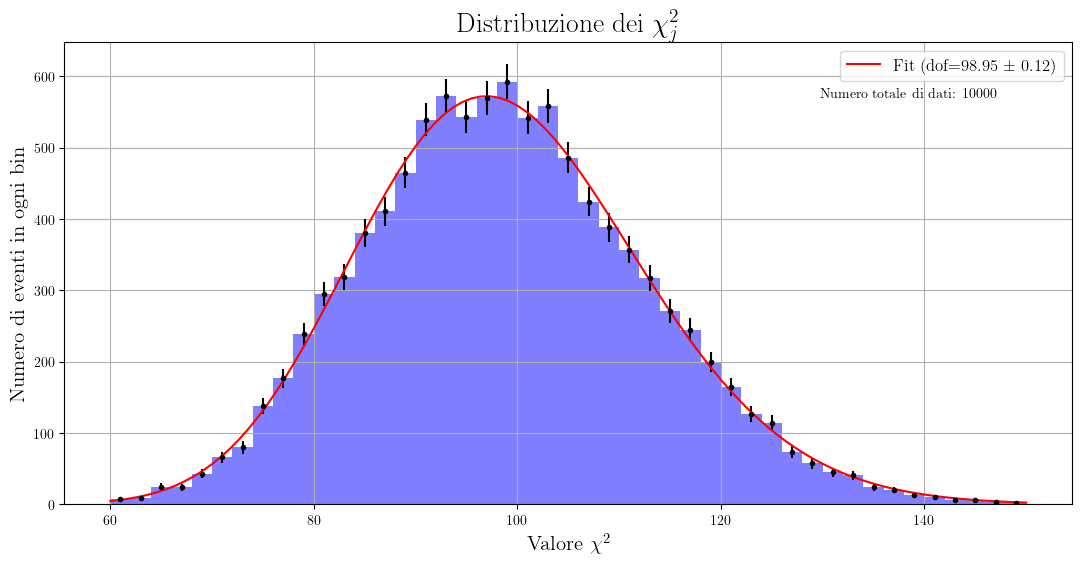

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

# Configurazioni per l'utilizzo di LaTeX per la resa del testo
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(13, 6))

# Carica i dati del chi quadro dalla colonna specificata nel file
chi_2 = np.loadtxt("esercizio_1.1/results.dat", usecols=(5), delimiter=' ', unpack=True)

# Numero di bins per l'istogramma
bin_edges = np.arange(60, 150.01, 2)  # Definisce i bordi dei bins
num_bins = len(bin_edges) - 1  # Calcola il numero di bins

# Calcola l'istogramma
n_bins, bins_edges = np.histogram(chi_2, bins=bin_edges)

# Calcola il numero totale di dati
total_data = len(chi_2)
bin_width = np.diff(bin_edges)[0]  # Calcola la larghezza del bin

# Crea l'istogramma non normalizzato
plt.hist(chi_2, bins=bins_edges, facecolor='blue', alpha=0.5, density=False)

# Calcola l'errore come la radice quadrata del numero di eventi nel bin
errors = np.sqrt(n_bins)

# Disegna gli errori sull'istogramma
for count, bin_edge, error in zip(n_bins, bins_edges[:-1], errors):
    plt.errorbar(bin_edge + bin_width / 2, count, yerr=error, fmt='.', color='black')

# Etichette e titolo
plt.xlabel('Valore $\chi^2$', fontsize=15)
plt.ylabel('Numero di eventi in ogni bin', fontsize=15)
plt.title('Distribuzione dei $\chi_j^2$', fontsize=20, fontweight="bold")

# Aggiungi testo per il numero totale di dati
plt.text(0.75, 0.9, f"Numero totale di dati: {total_data}", transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

# Definizione della funzione di fit per la distribuzione chi-quadro
def chi2_fit(x, df):
    return chi2.pdf(x, df) * total_data * bin_width

# Esegue il fit della distribuzione chi-quadro ai dati
popt, pcov = curve_fit(chi2_fit, bins_edges[:-1] + bin_width / 2, n_bins, p0=[90])
perr = np.sqrt(np.diag(pcov))

# Calcola il chi-quadro del fit
chi_squared = np.sum((n_bins - chi2_fit(bins_edges[:-1] + bin_width / 2, *popt))**2 / n_bins)

# Calcola il chi-quadro ridotto
chi_squared_reduced = chi_squared / (num_bins-1)

# Stampa i valori del chi-quadro e del chi-quadro ridotto
print("chi-quadro:", chi_squared)
print("Chi-quadro ridotto:", chi_squared_reduced)

# Plot del fit
x = np.linspace(60, 150, 100)  # Genera valori x per il plot del fit
plt.plot(x, chi2_fit(x, *popt), '-', label=f'Fit (dof={popt[0]:.2f} ± {perr[0]:.2f})', color='red')

# Mostra il plot
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

Dopo aver aggiunto la possibilità al generatore di numeri casuali di poter generare numeri distribuiti secondo un esponenziale decrescente e una lorentziana, ho provato a testare il teorema del limite centrale; questo afferma che se prendiamo $N \rightarrow \infty$ variabili random indipendenti e identicamente distribuite (con media $\mu$ e varianza finita $\sigma^2$) $x_1,...,x_N$, allora la variabile random costruita come
\begin{equation}
    A_N = \frac{1}{N} \sum_{n=1}^{N} x_n
\end{equation}
sarà distribuita come una Gaussiana con $\mu_{A_N}=\mu$ e $\sigma_{A_N}^2=\sigma^2/N$.

Quello che ho fatto dunque è generare $10^5$ valori di $A_N$ con N = 1,2,10,100 e $x_i$ generati da:
- $p_1(x)=\lambda e^{-\lambda x}$ con $\lambda = 1$ ($\mu = 1$  e  $\sigma^2 = 1$)
- $p_2(x)=1$ ($\mu = 1/2$  e  $\sigma^2 = 1/12$)
- $p_3(x)=\frac{1}{\pi}\frac{\Gamma}{\Gamma^2+x^2}$ con $\Gamma=1$ ($\mu = 0$  e  $\sigma^2 = \infty$)

Nei seguenti grafici sono dunque presenti gli istogrammi degli $A_N$. Per $N=100$, $p_1(x)$ e $p_2(x)$ ho effettuato un fit gaussiano e da questo ho stimato i valori di $\mu$ e $\sigma$; $p_3(x)$ invece ha varianza infinita e il teorema del limite centrale non vale; tuttavia si dimostra che la distribuzione degli $A_N$ converge proprio a una lorentziana, perciò ho effettuato un fit lorentziano.

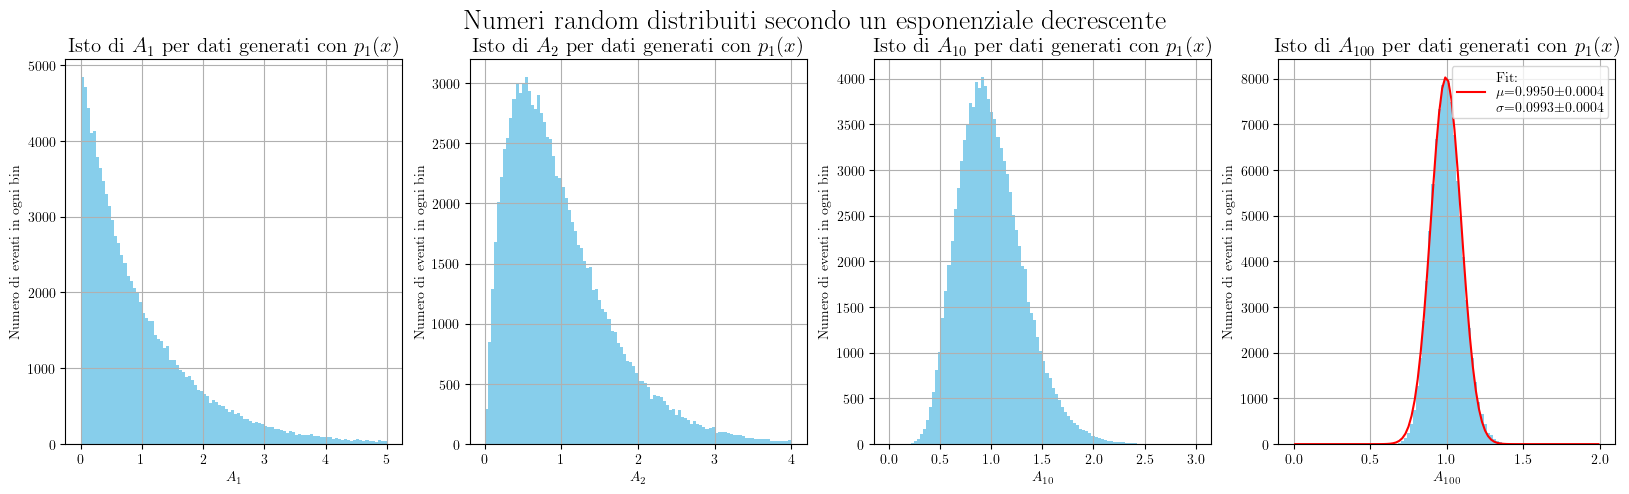

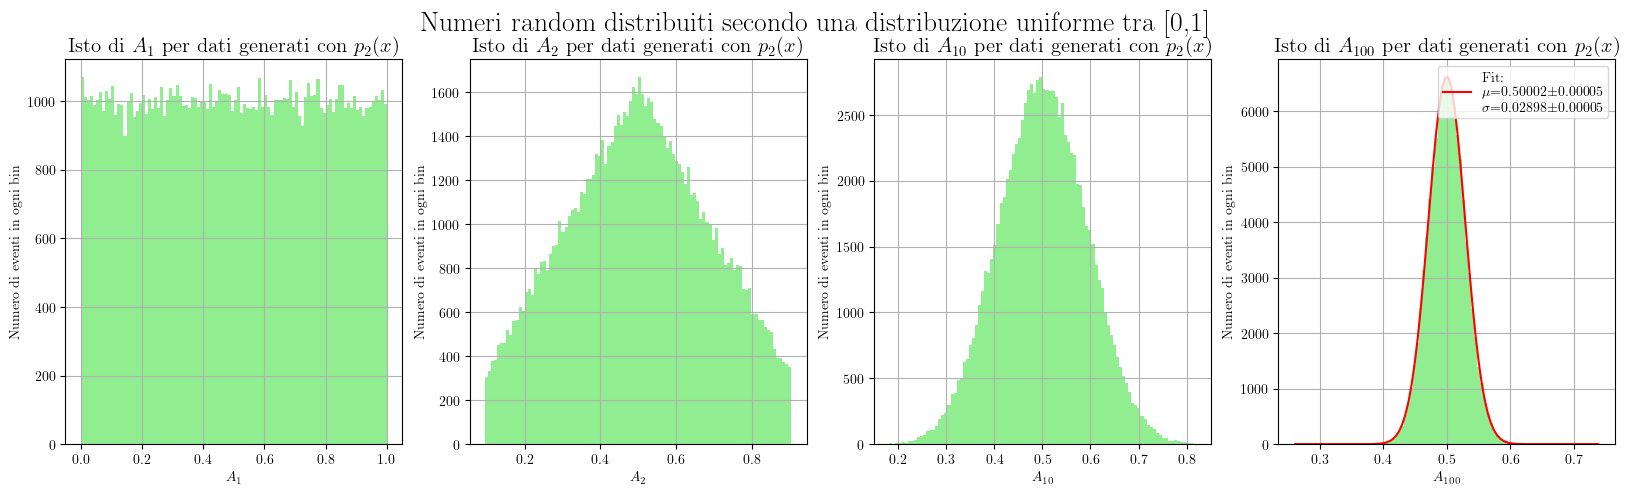

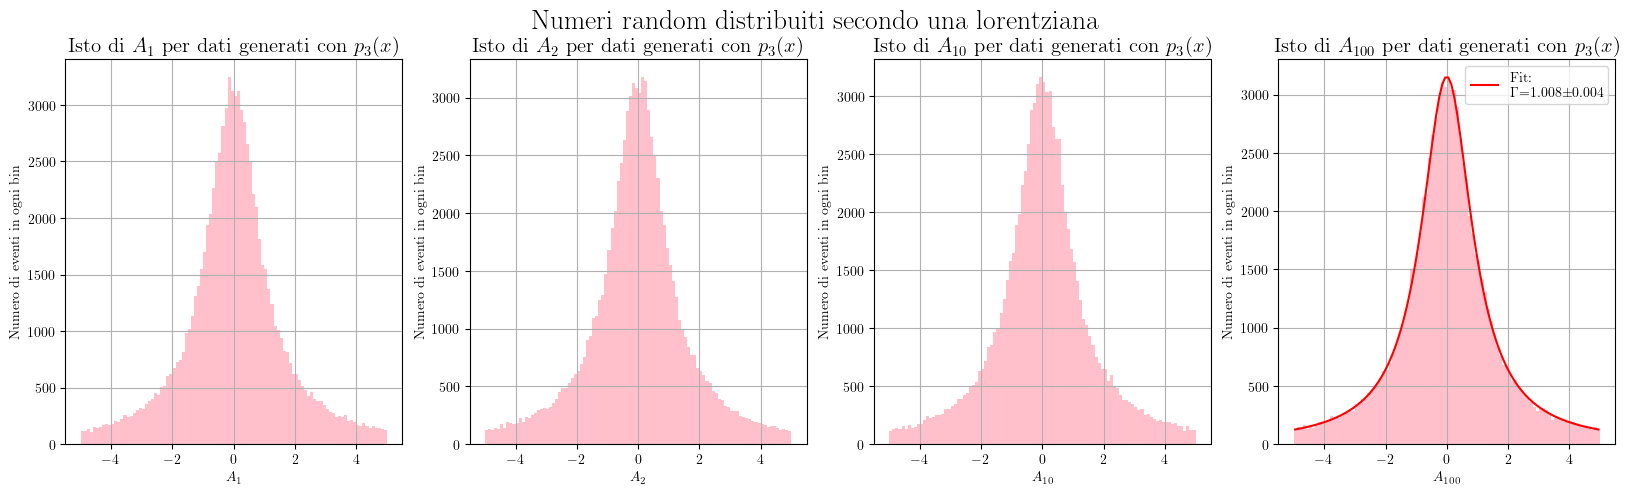

In [4]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

# Configurazione per la stampa con tre cifre significative
np.set_printoptions(precision=1, suppress=False)

# Configurazioni per l'utilizzo di LaTeX per la resa del testo
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Definizione della funzione gaussiana
def gauss(x, mean, devstd, norm):
    return 10**5*norm/(np.sqrt(2*np.pi*devstd**2)) * np.exp(-(x - mean)**2 / (2 * devstd**2))

# Definizione della funzione lorentziana
def lorentz(x, gamma):
    return 10**5/(10*np.pi) * gamma / (x**2 + gamma**2)

# Numero di bins per l'istogramma
n_bins = 100

# Creazione delle figure e degli assi per gli istogrammi
fig1, axs1 = plt.subplots(1, 4, figsize=(20, 5))
fig2, axs2 = plt.subplots(1, 4, figsize=(20, 5))
fig3, axs3 = plt.subplots(1, 4, figsize=(20, 5))

fig1.suptitle('Numeri random distribuiti secondo un esponenziale decrescente', fontsize=20, fontweight="bold")
fig2.suptitle('Numeri random distribuiti secondo una distribuzione uniforme tra [0,1]', fontsize=20, fontweight="bold")
fig3.suptitle('Numeri random distribuiti secondo una lorentziana', fontsize=20, fontweight="bold")


# Definizione di liste vuote per i dati
std = []
exp = []
lor = []

# Lista per il numero di dati (N)
N = [1, 2, 10, 100]

# Caricamento dei dati per la distribuzione esponenziale, Gaussiana e di Lorentz
for i in range(4):
    # Caricamento dei dati per la distribuzione esponenziale
    exp.append(np.loadtxt("esercizio_1.2/risultati_exp.dat", usecols=(i), delimiter=' ').tolist())
    # Creazione dell'istogramma per la distribuzione esponenziale
    n, bins, patches = axs1[i].hist(exp[i], bins=n_bins, range=(0, (5-i)), color='skyblue')
    # Etichette e titolo per l'istogramma della distribuzione esponenziale
    axs1[i].set_xlabel('$A_{'+f'{N[i]}'+'}$')
    axs1[i].set_ylabel('Numero di eventi in ogni bin')
    axs1[i].set_title('Isto di $A_{'+f'{N[i]}'+'}$ per dati generati con $p_1(x)$', fontsize=15)
    axs1[i].grid(True)
    if i == 3:
        # Calcolo del centro dei bin
        x = 0.5 * (bins[:-1] + bins[1:])
        # Fit della distribuzione gaussiana ai dati
        p_opt, p_cov = curve_fit(gauss, x, n, p0=[1,0.3,1])
        # Calcolo dei valori fittati per la gaussiana
        y_fit = gauss(x, p_opt[0], p_opt[1], (5-i)/n_bins)
        # Plot del fit sulla distribuzione esponenziale
        axs1[i].plot(x, y_fit, 'r-', label=f'Fit:\n $\mu$={p_opt[0]:.4f}$\pm${np.sqrt(np.diagonal(p_cov)[0]):.4f}\n \t \t $\sigma$={abs(p_opt[1]):.4f}$\pm${np.sqrt(np.diagonal(p_cov)[1]):.4f}')
        # Aggiungi la legenda al grafico
        axs1[i].legend()

    # Caricamento dei dati per la distribuzione Gaussiana
    std.append(np.loadtxt("esercizio_1.2/risultati_std.dat", usecols=(i), delimiter=' ').tolist())
    # Creazione dell'istogramma per la distribuzione Gaussiana
    n, bins, patches = axs2[i].hist(std[i], bins=n_bins, range=(1-np.exp(-i*0.1), np.exp(-i*0.1)), color='lightgreen')
    # Etichette e titolo per l'istogramma della distribuzione Gaussiana
    axs2[i].set_xlabel('$A_{'+f'{N[i]}'+'}$')
    axs2[i].set_ylabel('Numero di eventi in ogni bin')
    axs2[i].set_title('Isto di $A_{'+f'{N[i]}'+'}$ per dati generati con $p_2(x)$', fontsize=15)
    axs2[i].grid(True)
    if i == 3:
        # Calcolo del centro dei bin
        x = 0.5 * (bins[:-1] + bins[1:])
        # Fit della distribuzione gaussiana ai dati
        p_opt, p_cov = curve_fit(gauss, x, n, p0=[0.5,1,1])
        # Calcolo dei valori fittati per la gaussiana
        y_fit = gauss(x, p_opt[0], p_opt[1], (2*np.exp(-i*0.1)-1)/n_bins)
        # Plot del fit sulla distribuzione Gaussiana
        axs2[i].plot(x, y_fit, 'r-', label=f'Fit:\n $\mu$={p_opt[0]:.5f}$\pm${np.sqrt(np.diagonal(p_cov)[0]):.5f}\n \t \t $\sigma$={abs(p_opt[1]):.5f}$\pm${np.sqrt(np.diagonal(p_cov)[1]):.5f}')
        # Aggiungi la legenda al grafico
        axs2[i].legend()

    # Caricamento dei dati per la distribuzione di Lorentz
    lor.append(np.loadtxt("esercizio_1.2/risultati_lor.dat", usecols=(i), delimiter=' ').tolist())
    # Creazione dell'istogramma per la distribuzione di Lorentz
    n, bins, patches = axs3[i].hist(lor[i], bins=n_bins, range=(-5, 5), color='pink')
    # Etichette e titolo per l'istogramma della distribuzione di Lorentz
    axs3[i].set_xlabel('$A_{'+f'{N[i]}'+'}$')
    axs3[i].set_ylabel('Numero di eventi in ogni bin')
    axs3[i].set_title('Isto di $A_{'+f'{N[i]}'+'}$ per dati generati con $p_3(x)$', fontsize=15)
    axs3[i].grid(True)
    if i == 3:
        # Calcolo del centro dei bin
        x = 0.5 * (bins[:-1] + bins[1:])
        # Fit della distribuzione di Lorentz ai dati
        p_opt, p_cov = curve_fit(lorentz, x, n, p0 = 1.2)
        # Calcolo dei valori fittati per la distribuzione di Lorentz
        y_fit = lorentz(x, p_opt[0])
        # Plot del fit sulla distribuzione di Lorentz
        axs3[i].plot(x, y_fit, 'r-', label=f'Fit:\n $\Gamma$={p_opt[0]:.3f}$\pm${np.sqrt(np.diagonal(p_cov)[0]):.3f}')
        # Aggiungi la legenda al grafico
        axs3[i].legend()

plt.show()


Quello che osserviamo dalle prime due righe di grafici è proprio quello che ci aspettiamo dal teorema del limite centrale; in particolare per N = 100 abbiamo i seguenti risultati dai fit:
- $\mu_{expected} = 1$, $~$ $\mu_{measure}=0.9950\pm0.0004$; $~~~$ $\sigma_{expected}=1/\sqrt{100}=1/10$, $~$ $\sigma_{measure}=0.0993\pm0.0004$
- $\mu_{expected} = 0.5$, $~$ $\mu_{measure}=0.50002\pm0.00005$; $~~~$ $\sigma_{expected}=\frac{1}{\sqrt{12\times100}}\simeq0.02886$, $~$ $\sigma_{measure}=0.02898\pm0.00005$

Come si vede i risultati sono simili ma non sempre compatibili con quelli aspettati; questa differenza si spiega affermando che il teorema del limite centrale è valido solo nel limite in cui N è infinito.

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

Con questo esercizio si vuole stimare il valore di $\pi$ simulando l'esperimento di Buffon.

Chiamando le coordinate del piano x e z, ho estratto un valore $z_1$ per la cordinata z dell primo estremo dell'ago e un angolo $\theta$ tra $[0,2\pi]$; la coordinata z del secondo estremo dell'ago sarà $z_2 = z_1 + L\times cos(\theta)$. La difficoltà in questo caso è il campionamento dell'angolo $\theta$ tra $[0,2\pi]$: per farlo ho usato un metodo accept-reject che estrae due punti x,y tra [-1,1] e accetta questa coppia solo se il punto (x,y) si trova nel cerchio di raggio unitario; questi individuano un angolo e un $cos(\theta)=\frac{y}{\sqrt{x^2+y^2}}$.

Trovata dunque la posizione dell'ago, si calcola il numero di lanci che intersecano le rette orizzontali $x=0$ e $x=d$, in modo da stimare il $\pi$ come:
$$\pi = \frac{2L}{d}\frac{N_{thr}}{N_{hit}}$$

Come dati di input per la simulazione ho utilizzato $N_{throw}=10^8$, divisi in 1000 blocchi, $d=1$ e $L=0.8$.

Nel grafico segeunte si riporta la stima di $\pi$ al crescere del numero di blocchi (e quindi di lanci):

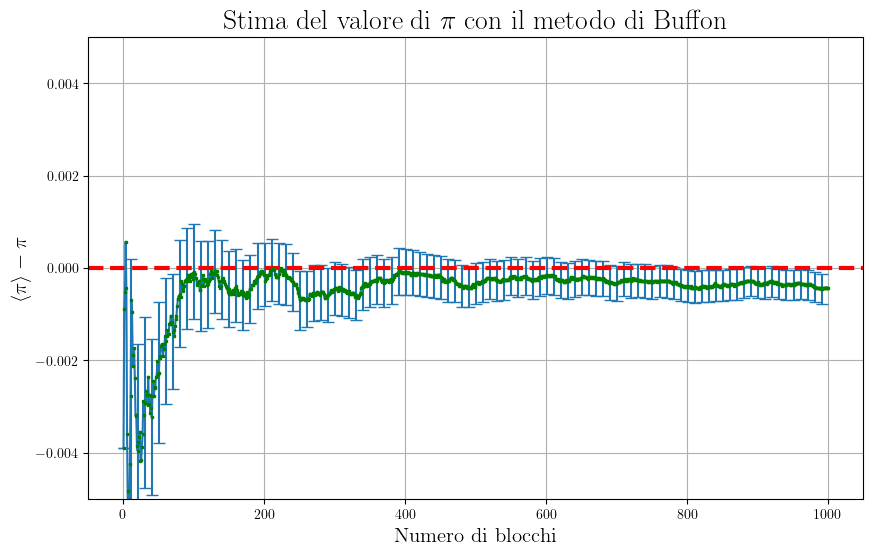

In [5]:
#ESERCIZIO 3


import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(10, 6))
x, y, error = np.loadtxt("esercizio_1.3/risultati.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,y-np.pi,yerr=error,errorevery=10,capsize=4,marker='s',mfc='green',mec='green', ms=2, mew=1)
plt.xlabel('Numero di blocchi', fontsize=15)
plt.ylabel(r'$\langle \pi \rangle - \pi$', fontsize=15)
plt.ylim(-0.005, 0.005)
plt.title('Stima del valore di $\pi$ con il metodo di Buffon', fontsize=20)
plt.axhline(y=0, color='red', linestyle='--', linewidth=3)  # Aggiunge l'asse y = 0
plt.grid()
plt.show()

Come si vede dal grafico la misura tende entro un sigma al valore effettivo di $\pi$.

### <span style="color:blue">Computing statistical uncertainties: the blocking method</span>
- A fundamental step in every Monte Carlo calculation is the estimation of its statistical uncertainty, **it's a must!** Your task would not be completed if you had not calculated it.


In computing the statistical uncertainties, i.e. the standard deviation of the mean, you need an estimation of the variance $\sigma^2$, the second central moment. First of all note that the variance can be computed from
$$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$
What is the best way to estimate $\sigma^2_A$? Imagine that your Monte Carlo estimation of $A$ is obtained from a calculation which uses $M$ Monte Carlo "steps" (intentionally, here I am generic because what is a single "step" in a Monte Carlo calculation strictly depends on the specific calculation); you can always divide such $M$ Monte Carlo "steps" in $N$ blocks, with $N<M$. In each block, you can use your $M/N$ Monte Carlo "steps" to obtain an estimate of $A$, let me call it $A_i$ with $i=1,N$, and then you have also $A^2_i$ with $i=1,N$.
At this point everything becomes clear:
$$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
and finally the statistical uncertainty with $N$ :
$$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$


- <font color="blue">In a Monte Carlo calculation, you can use the arguments above to outputting an estimate of A and its statistical uncertainty on the fly, during your calculation. You will be able to do this every $M/N$ steps, and thus, in the end, $N$ times</font>. Note that after the first $M/N$ Monte Carlo steps, at the end of the first block, your estimation of the uncertainty is not computable, so set it to zero and compute it only from the second block. **Question**: $N$ can be chosen in many ways ... what are the limitations regarding this choice?